In [ ]:
!gdown 1OoeeZRnSi8QRlX0toom0gnuEMKN0LQoF

Downloading...
From: https://drive.google.com/uc?id=1OoeeZRnSi8QRlX0toom0gnuEMKN0LQoF
To: /content/patternDataset.csv
100% 763M/763M [00:04<00:00, 162MB/s]


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('patternDataset.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,sentiment_coeff,tfidf_scores,sentence,sentiment,sentiment_rate,prediction,new_predicted
0,0,0,"[1.083278598569799, -0.9697309385804362, -0.96...","[11.11540536742055, 8.530709247024179, 5.14603...",89_member medical_team has_been dispatched by ...,0,-119.661876,1,1
1,1,1,"[-0.9805764616248396, -0.9843021256154544, -0....","[1.2062910820851462, 4.510408198354314, 3.3749...",earthquake relief in turkey aerial recovery fo...,0,-183.453875,1,1
2,2,2,"[-0.9782029104247226, -0.9917034716429152, -0....","[6.299007596345884, 10.627052599506618, 3.9252...",the mozaik_foundation have launched_an emergen...,0,-219.423624,1,1
3,3,3,"[-1.0033012777444754, -0.9978815738872362, -0....","[3.3210552052332716, 6.498087047496811, 5.7963...",this call to contribute to earthquake relief i...,0,-195.022992,1,1
4,4,4,"[-0.9688911574963032, -1.0300744553954169, -0....","[1.6874984482290247, 11.11540536742055, 4.7242...",in compliance_with the royal_orders of sultan_...,0,-12.322221,1,1
...,...,...,...,...,...,...,...,...,...
667459,667459,667459,"[-0.9620123954992812, -0.9829324901251042, -1....","[5.875423577885476, 1.9321317203066528, 12.013...",according to biblical_prophecy earthquakes are...,0,-189.023554,1,1
667460,667460,667460,"[-0.975402834368356, -0.9782029104247226, -0.9...","[3.0448234052301566, 4.724255697259413, 2.7681...",are the earthquakes causing the shift in the t...,0,-48.981939,1,1
667461,667461,667461,"[-1.020845641329861, -1.0144426770004131, -0.9...","[5.011108289816041, 7.90854389491356, 3.925203...",do you have a story to tell ? are you kp citiz...,0,17.439119,0,1
667462,667462,667462,"[1.1686072069749414, -0.9782029104247226, -0.9...","[10.316897671202778, 1.574751899086471, 1.2062...",nowplaying the earthquake stefano_carparelli b...,0,95.554612,0,1


In [ ]:
data=df[['sentence','new_predicted']]

In [ ]:
data_pos = data[data['new_predicted'] == 1]
data_neg = data[data['new_predicted'] == 0]

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['sentence']=dataset['sentence'].str.lower()
dataset['sentence'].tail()

667430    ive just_heard about the earthquake this is an...
667431    earthquake shit i_thought a propane tank exploded
667434    ai went too far this time can_t believe the wh...
667449    it s a right_decision to cancel dizis another ...
667456    this annoucement looks_like there is a earthqu...
Name: sentence, dtype: object

In [ ]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['sentence'] = dataset['sentence'].apply(lambda text: cleaning_stopwords(text))
dataset['sentence'].head()

0    89_member medical_team has_been dispatched agr...
1    earthquake relief turkey aerial recovery looki...
2    mozaik_foundation launched_an emergency relief...
3    call contribute earthquake relief turkey comes...
4    compliance_with royal_orders sultan_haitham bi...
Name: sentence, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['sentence']= dataset['sentence'].apply(lambda x: cleaning_punctuations(x))
dataset['sentence'].tail()

667430    ive justheard earthquake unbelievable tragedy ...
667431       earthquake shit ithought propane tank exploded
667434    ai went far time cant believe wholeworld got p...
667449    rightdecision cancel dizis another week earthq...
667456    annoucement lookslike earthquake coming miss d...
Name: sentence, dtype: object

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['sentence'] = dataset['sentence'].apply(lambda x: cleaning_repeating_char(x))
dataset['sentence'].tail()

667430    ive justheard earthquake unbelievable tragedy ...
667431       earthquake shit ithought propane tank exploded
667434    ai went far time cant believe wholeworld got p...
667449    rightdecision cancel dizis another week earthq...
667456    annoucement lookslike earthquake coming miss d...
Name: sentence, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+)|(http?://[^s]+))',' ',data)
dataset['sentence'] = dataset['sentence'].apply(lambda x: cleaning_URLs(x))
dataset['sentence'].tail()

667430    ive justheard earthquake unbelievable tragedy ...
667431       earthquake shit ithought propane tank exploded
667434    ai went far time cant believe wholeworld got p...
667449    rightdecision cancel dizis another week earthq...
667456    annoucement lookslike earthquake coming miss d...
Name: sentence, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['sentence'] = dataset['sentence'].apply(lambda x: cleaning_numbers(x))
dataset['sentence'].tail()

667430    ive justheard earthquake unbelievable tragedy ...
667431       earthquake shit ithought propane tank exploded
667434    ai went far time cant believe wholeworld got p...
667449    rightdecision cancel dizis another week earthq...
667456    annoucement lookslike earthquake coming miss d...
Name: sentence, dtype: object

In [ ]:
from nltk.tokenize import TweetTokenizer


In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(r'w+')
dataset['sentence'] = dataset['sentence'].apply(tokenizer.tokenize)
dataset['sentence'].head()

0    [member, medicalteam, hasbeen, dispatched, agr...
1    [earthquake, relief, turkey, aerial, recovery,...
2    [mozaikfoundation, launchedan, emergency, reli...
3    [call, contribute, earthquake, relief, turkey,...
4    [compliancewith, royalorders, sultanhaitham, b...
Name: sentence, dtype: object

In [ ]:
dataset

,sentence,new_predicted
0,"[member, medicalteam, hasbeen, dispatched, agr...",1
1,"[earthquake, relief, turkey, aerial, recovery,...",1
2,"[mozaikfoundation, launchedan, emergency, reli...",1
3,"[call, contribute, earthquake, relief, turkey,...",1
4,"[compliancewith, royalorders, sultanhaitham, b...",1
...,...,...
667430,"[ive, justheard, earthquake, unbelievable, tra...",0
667431,"[earthquake, shit, ithought, propane, tank, ex...",0
667434,"[ai, went, far, time, cant, believe, wholeworl...",0
667449,"[rightdecision, cancel, dizis, another, week, ...",0


In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['sentence']= dataset['sentence'].apply(lambda x: stemming_on_text(x))
dataset['sentence'].head()

0    [member, medicalteam, hasbeen, dispatched, agr...
1    [earthquake, relief, turkey, aerial, recovery,...
2    [mozaikfoundation, launchedan, emergency, reli...
3    [call, contribute, earthquake, relief, turkey,...
4    [compliancewith, royalorders, sultanhaitham, b...
Name: sentence, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['sentence'] = dataset['sentence'].apply(lambda x: lemmatizer_on_text(x))
dataset['sentence'].head()

0    [member, medicalteam, hasbeen, dispatched, agr...
1    [earthquake, relief, turkey, aerial, recovery,...
2    [mozaikfoundation, launchedan, emergency, reli...
3    [call, contribute, earthquake, relief, turkey,...
4    [compliancewith, royalorders, sultanhaitham, b...
Name: sentence, dtype: object

In [ ]:
dataset

,sentence,new_predicted
0,"[member, medicalteam, hasbeen, dispatched, agr...",1
1,"[earthquake, relief, turkey, aerial, recovery,...",1
2,"[mozaikfoundation, launchedan, emergency, reli...",1
3,"[call, contribute, earthquake, relief, turkey,...",1
4,"[compliancewith, royalorders, sultanhaitham, b...",1
...,...,...
667430,"[ive, justheard, earthquake, unbelievable, tra...",0
667431,"[earthquake, shit, ithought, propane, tank, ex...",0
667434,"[ai, went, far, time, cant, believe, wholeworl...",0
667449,"[rightdecision, cancel, dizis, another, week, ...",0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.to_csv('/content/drive/MyDrive/sentimentAnalysis/dataset.csv')

In [ ]:
X=data.sentence
y=data.new_predicted

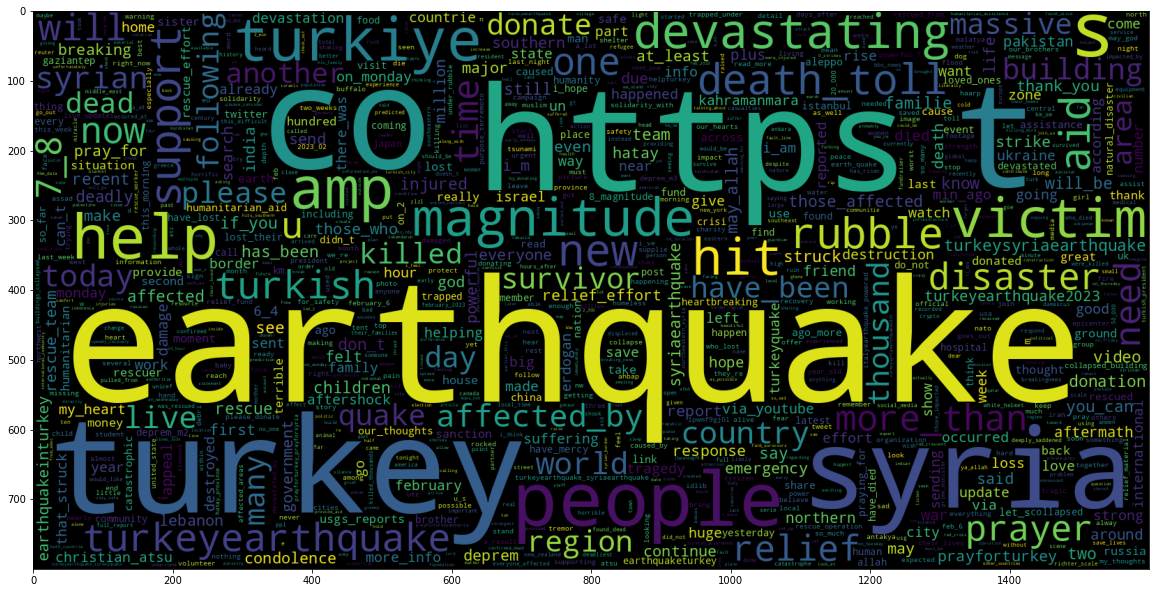

In [ ]:
data_neg = data['sentence'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

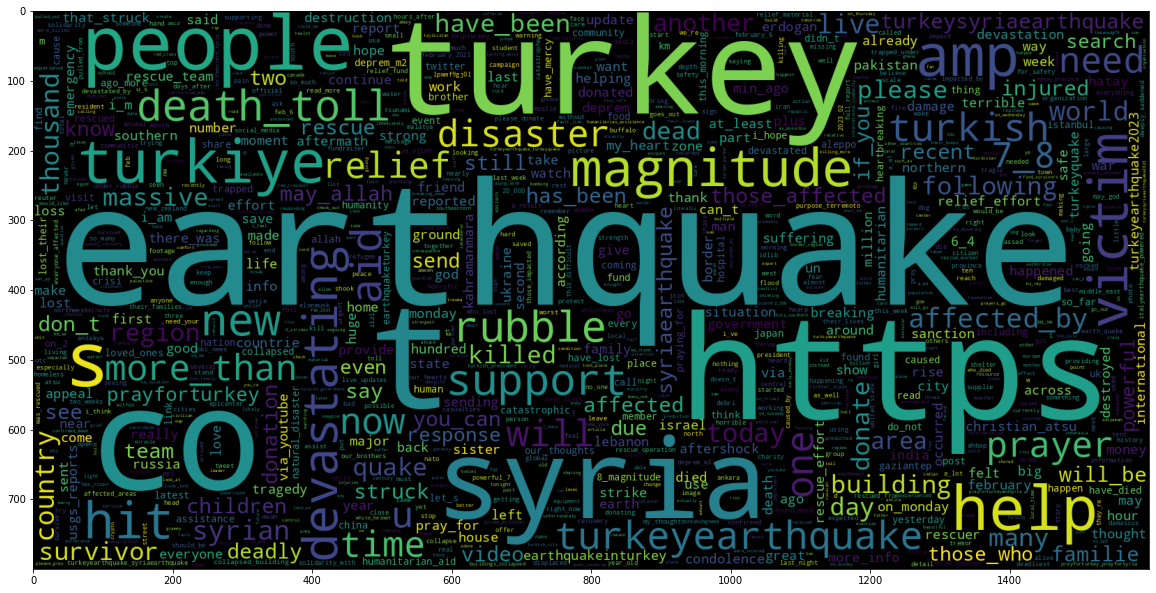

In [ ]:
data_pos = data['sentence']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state =0)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  500000


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
X_train

<467224x500000 sparse matrix of type '<class 'numpy.float64'>'
	with 16813578 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.60      0.79      0.68     44261
           1       0.93      0.85      0.89    155979

    accuracy                           0.84    200240
   macro avg       0.77      0.82      0.79    200240
weighted avg       0.86      0.84      0.84    200240



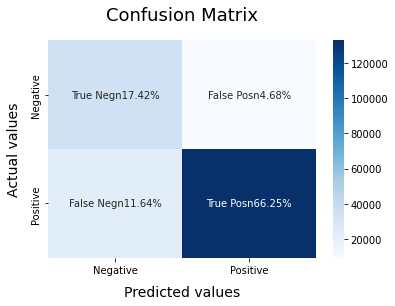

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

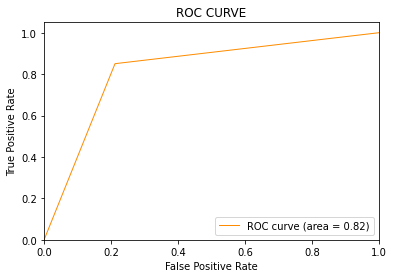

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     44261
           1       0.98      0.99      0.99    155979

    accuracy                           0.98    200240
   macro avg       0.97      0.96      0.97    200240
weighted avg       0.98      0.98      0.98    200240



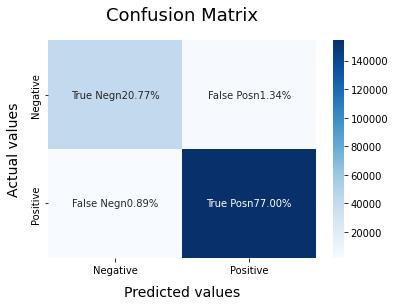

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

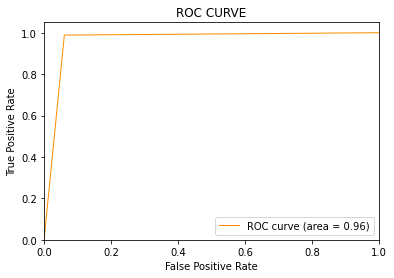

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     44261
           1       0.97      0.99      0.98    155979

    accuracy                           0.96    200240
   macro avg       0.96      0.93      0.95    200240
weighted avg       0.96      0.96      0.96    200240



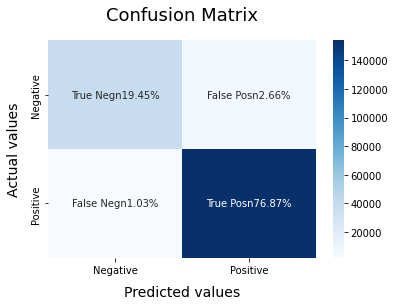

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

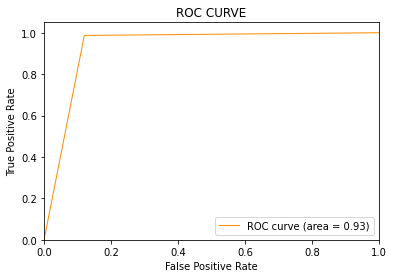

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#KNN method
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
model_Evaluate(knn)
y_pred4 = knn.predict(X_test)


ANN

In [ ]:
Xtrain

0         [member, medicalteam, hasbeen, dispatched, agr...
1         [earthquake, relief, turkey, aerial, recovery,...
2         [mozaikfoundation, launchedan, emergency, reli...
3         [call, contribute, earthquake, relief, turkey,...
4         [compliancewith, royalorders, sultanhaitham, b...
                                ...                        
667430    [ive, justheard, earthquake, unbelievable, tra...
667431    [earthquake, shit, ithought, propane, tank, ex...
667434    [ai, went, far, time, cant, believe, wholeworl...
667449    [rightdecision, cancel, dizis, another, week, ...
667456    [annoucement, lookslike, earthquake, coming, m...
Name: sentence, Length: 667464, dtype: object

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/sentimentAnalysis/dataset.csv")

In [ ]:
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from gensim.models import Word2Vec
from numpy import asarray
from numpy import zeros
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import RegexpTokenizer
import plotly
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
# general imports
import math
from bs4 import BeautifulSoup
import tensorflow as tf
import numpy as np
import skimage
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
import missingno as msno


ImportError: ignored

In [ ]:

# Assign X_train, X_test, y_train & y_test
Xtrain = dataset['sentence']
Xtest  = dataset['sentence']
ytrain = dataset['new_predicted']
ytest  = dataset['new_predicted']

ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf



In [ ]:

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn.metrics import accuracy_score, confusion_matrix

# create the tokenizer to tokenize each word
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(Xtrain)
# encode training data set
Xtrain1 = tokenizer.texts_to_matrix(Xtrain, mode='count')

# encode training data set
Xtest1 = tokenizer.texts_to_matrix(Xtest, mode='count')

n_words1 = Xtest1.shape[1]


NameError: ignored

In [ ]:
model = tf.keras.models.Sequential([
       
    tf.keras.layers.Dense(256, input_shape=(n_words1,), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
          
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.001),
              metrics=['acc'])

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

history = model.fit(Xtrain1, y_train,
                    epochs=20,
                    validation_data=(Xtest1, y_test,),
                    verbose=1,
                    callbacks=callbacks,
                   )